## Исследование данных о российском кинопрокате



**Описание проекта**

Заказчик исследования — Министерство культуры Российской Федерации.
Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.
Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Шаг 1. Открыть файлы с данными и объединить их в один датафрейм**
* Объединить данные таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм.
Пути к файлам:
/datasets/mkrf_movies.csv — данные о прокатных удостоверениях.
/datasets/mkrf_shows.csv — данные о прокате в российских кинотеатрах.

**Шаг 2. Предобработка данных**
* Проверить типы данных в датафрейме и преобразовать там, где это необходимо.
* Изучить пропуски в датафрейме. Объяснить, почему были заполнены пропуски определённым образом или почему не надо было это делать.
* Проверить, есть ли в данных дубликаты. Описать причины, которые могли повлиять на появление дублей.
* Изучить столбцы, которые содержат категориальные значения:
* Посмотреть, какая общая проблема встречается почти во всех категориальных столбцах;
* Исправить проблемные значения в поле type.
* Изучить столбцы, которые хранят количественные значения. Проверить, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?
* Добавить новые столбцы:

1) Создать столбец с информацией о годе проката. Выделить год из даты премьеры фильма;

2) Создать два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;

3) Посчитать, какую долю от общего бюджета фильма составляет государственная поддержка.

**Шаг 3. Провести исследовательский анализ данных**
* Посмотреть, сколько фильмов выходило в прокат каждый год. Данные о прокате в кинотеатрах известны не для всех фильмов. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализировать, как эта доля менялась по годам. Сделать вывод о том, какой период полнее всего представлен в данных.
* Изучить, как менялась динамика проката по годам. Узнать, в каком году сумма сборов была минимальной и максимальной.
* С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года. Сравнить значения и сделать выводы.
* Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Узнать, фильмы с каким возрастным ограничением собрали больше всего денег в прокате. Узнать, меняется ли картина в зависимости от года. Если да, предположить, с чем это может быть связано.

**Шаг 4. Исследовать фильмы, которые получили государственную поддержку**
* На этом этапе нет конкретных инструкций и заданий — поискать интересные закономерности в данных. Посмотреьь, сколько выделяют средств на поддержку кино. Проверить, хорошо ли окупаются такие фильмы, какой у них рейтинг.

**Шаг 5. Написать общий вывод**

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.

Обратить внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратим внимание на тип данных столбца, по которому мы будем соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
import seaborn as sns # импорт библиотеки seaborn
import matplotlib.pyplot as plt #импорт библиотеки matplotlib.pyplot
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) #Скрываем лишние предупреждения

try:
    mkrf_movies = pd.read_csv('C:\Data\mkrf_movies.csv') #открываем первую таблицу
    
    
except:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
    

In [2]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
mkrf_movies.head(10) # получение первых 10 строк таблицы mkrf_movie

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [4]:
mkrf_movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [5]:
sorted(mkrf_movies['puNumber'].unique())

[' 111004112',
 '111000110',
 '111000111',
 '111000112',
 '111000113',
 '111000114',
 '111000115',
 '111000116',
 '111000117',
 '111000118',
 '111000119',
 '111000210',
 '111000211',
 '111000212',
 '111000213',
 '111000214',
 '111000215',
 '111000216',
 '111000217',
 '111000218',
 '111000219',
 '111000310',
 '111000311',
 '111000312',
 '111000313',
 '111000314',
 '111000315',
 '111000317',
 '111000318',
 '111000319',
 '111000410',
 '111000411',
 '111000412',
 '111000413',
 '111000414',
 '111000415',
 '111000416',
 '111000417',
 '111000418',
 '111000419',
 '111000510',
 '111000511',
 '111000512',
 '111000513',
 '111000514',
 '111000515',
 '111000516',
 '111000517',
 '111000518',
 '111000519',
 '111000610',
 '111000611',
 '111000612',
 '111000613',
 '111000614',
 '111000615',
 '111000616',
 '111000617',
 '111000618',
 '111000619',
 '111000710',
 '111000711',
 '111000712',
 '111000714',
 '111000715',
 '111000716',
 '111000717',
 '111000718',
 '111000719',
 '111000810',
 '111000811',
 '111

In [6]:
mkrf_movies.isna().sum() #проверяем таблицу на пропуски

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

In [7]:
try:
    mkrf_shows = pd.read_csv('C:\Data\mkrf_shows.csv') #открываем вторую таблицу
    
except:
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [8]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [9]:
mkrf_shows.head(10) # получение первых 10 строк таблицы mkrf_shows

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


In [10]:
mkrf_shows.isna().sum() #проверяем на пропуски

puNumber      0
box_office    0
dtype: int64

In [11]:
mkrf_shows['box_office'].describe()

count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64

### Вывод

Было отмечено следующее:

В первой таблице `mkrf_movies`:

1) Необходимо заменить `puNumber` в первой таблице на значение int;

2) Столбец `show_start_date` перевести в тип datetime;

3) Есть дубликат в категории фильма, нужно будет убрать пробел;

4) Имеются пробелы в столбце `puNumber`;

5) Имеются значительные пропуски, причём одинаковое число в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, но скорее всего, это касается фильмов, которые получили государственную поддержку. Также имеются пропуски в `genres`, `ratings`, `producer`, а также незначительные пропуски в столбцах `film_studio director`, `production_country`.

Во второй таблице `mkrf_shows`:

1) Пропусков не имеется. Однако заметна большая разница в столбце `box_office` между медианным (2.327988) и средним (7.647870). Имеются также сборы, которые равнны нулю. Значит фильмы либо не выходили в прокат, либо их ещё никто не смотрел.

Займемся объединением таблиц `mkrf_movies` и `mkrf_shows`. Для этого заменим исправим значения в столбце `puNumber`

In [12]:
mkrf_movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [13]:
mkrf_movies['puNumber'].count()

7486

In [14]:
mkrf_movies = mkrf_movies.replace(' Художественный', 'Художественный')
mkrf_movies = mkrf_movies.replace(' Анимационный', 'Анимационный')

In [15]:
mkrf_movies['type'].unique() #Проверяем замену

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [16]:
mkrf_movies['puNumber'].count() #Проверяем число строк после замены

7486

In [17]:
mkrf_movies = mkrf_movies.replace(' 111004112', '111004112')

In [18]:
sorted(mkrf_movies['puNumber'].unique())

['111000110',
 '111000111',
 '111000112',
 '111000113',
 '111000114',
 '111000115',
 '111000116',
 '111000117',
 '111000118',
 '111000119',
 '111000210',
 '111000211',
 '111000212',
 '111000213',
 '111000214',
 '111000215',
 '111000216',
 '111000217',
 '111000218',
 '111000219',
 '111000310',
 '111000311',
 '111000312',
 '111000313',
 '111000314',
 '111000315',
 '111000317',
 '111000318',
 '111000319',
 '111000410',
 '111000411',
 '111000412',
 '111000413',
 '111000414',
 '111000415',
 '111000416',
 '111000417',
 '111000418',
 '111000419',
 '111000510',
 '111000511',
 '111000512',
 '111000513',
 '111000514',
 '111000515',
 '111000516',
 '111000517',
 '111000518',
 '111000519',
 '111000610',
 '111000611',
 '111000612',
 '111000613',
 '111000614',
 '111000615',
 '111000616',
 '111000617',
 '111000618',
 '111000619',
 '111000710',
 '111000711',
 '111000712',
 '111000714',
 '111000715',
 '111000716',
 '111000717',
 '111000718',
 '111000719',
 '111000810',
 '111000811',
 '111000812',
 '1110

Мы пытались преобразовать столбец в целочисленный тип (int), но столкнулись с тем, что 

In [19]:
len(mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет'])

1

In [20]:
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет', 'puNumber']

1797    нет
Name: puNumber, dtype: object

In [21]:
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет', 'puNumber'] = 0 #заменим нет нулём

In [22]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype(int) #заменим тип столбца на int

In [23]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Теперь можно объединять столбцы.

In [24]:
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Слияние таблиц произошло успешно. Все 3158 строк присоединились без потерь. Можно работать дальше

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

Преобразуем таблицу `show_start_date` в привычный вид

In [26]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [27]:
data.info() #Проверяем

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [28]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Имеются процентные значения, которые не подходят под значение рейтинга

In [29]:
unknown_ratings = ['99%', '28%', '97%', '83%', '64%', '91%', '94%', '62%', '79%', '90%', '19%', '88%', '89%', '98%']

In [30]:
data.query('ratings in @unknown_ratings').sort_values(by='ratings')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3431,Наурыз,131000217,2017-03-09 12:00:00+00:00,Художественный,Эс Джи,Республика Казахстан,Аскар Бисембин,"Олег Головашкин, Алмас Султангазин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,19%,комедия,3.796000e+04
811,От винта!,114000212,2012-08-06 12:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия",1.740000e+03
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама",5.287326e+08
7159,Анна Каренина. Интимный дневник,111013919,2019-10-23 12:00:00+00:00,Художественный,"ООО ""РТВ""",Россия,Ю.Грымов,Ю.Грымов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,79%,драма,1.828825e+05
2680,Год Белого Слона,111003915,2015-04-08 12:00:00+00:00,Художественный,"ООО ""Творческое объединение ЮГ""",Россия,Ю.Грымов,П.Поляков,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,79%,семейный,NaN
3446,Короткие истории о любви - 4,126006316,2016-12-30 12:00:00+00:00,Прочие,"Нетворг Айлэнд Телевижн, Магнетфильм, Шорткатс...",Великобритания - Аргентина - США - Франция - Р...,"Д.Адар, П.Антохин, М.Биасин, А.Бурунова, К.Кол...","Д.Адар, Д.Амсон, П.Антохин, А.Армстронг, С.Бил...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,2.266408e+06
5455,Вечный холод,111006417,2017-08-28 12:00:00+00:00,Художественный,"ЗАО ""Производственный комплекс ""ГЛАВКИНО"", ООО...",Россия,А.Мигачев,И.Бачурин,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,"фэнтези,боевик,триллер",NaN
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00+00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,1.429859e+06
5332,Добыча.,121009411,2011-06-15 12:00:00+00:00,Художественный,Афтер Дарк Филмз,США,Патрик Сиверсен,"Закари Ти Брайан, Кристофер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,88%,"фантастика,боевик,триллер",NaN


Скорее всего, при слиянии баз, другая оценка проводилась в процентном значении, где 100% - наилучная оценка, а 0% - наихудшая

In [31]:
data['corrected_ratings'] = data['ratings']
data.loc[data['corrected_ratings'].isin(unknown_ratings), 'corrected_ratings'] = np.nan

In [32]:
data['corrected_ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '1.0',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

In [33]:
data['ratings'].isna().sum()

967

In [34]:
#data['corrected_ratings'] = data['corrected_ratings'].astype(int) # не получается, поскольку есть NaN
data['corrected_ratings'] = pd.to_numeric(data['corrected_ratings'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [36]:
data['ratings'] = data['corrected_ratings'] #Переписываем значение столбца, чтобы перевести его в дробное значение float, чтобы процентные значения презвратились в NaN

In [37]:
del data['corrected_ratings'] #удаляем столбец

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [39]:
data['ratings'].isna().sum()

996

**Вывод**

Мы заменили тип в столбце `show_start_date` на datetime и заменили на NaN процентные значения в столбце `ratings`.

#### Шаг 2.2. Изучим пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [40]:
data.isna().mean()

title                    0.000000
puNumber                 0.000000
show_start_date          0.000000
type                     0.000000
film_studio              0.002404
production_country       0.000267
director                 0.001202
producer                 0.075875
age_restriction          0.000000
refundable_support       0.955651
nonrefundable_support    0.955651
budget                   0.955651
financing_source         0.955651
ratings                  0.133048
genres                   0.130377
box_office               0.578146
dtype: float64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [42]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

Имеются значительные пропуски, причём одинаковое число в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`, но скорее всего, это касается фильмов, которые получили государственную поддержку. Также имеются пропуски в `genres`, `ratings`, `producer`, а также незначительные пропуски в столбцах `film_studio director`, `production_country`.

**Пропуски в столбце 'film_studio'**

In [43]:
data[data['film_studio'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Здесь, скорее всего пропуски оправданы, поскольку это, скорее всего, авторское кино, без студий. Мульт личности только выбиваются из пропусков. Это - Первый канал

In [44]:
data.loc[4441, 'film_studio'] = 'Первый канал' #Присваиваем первый канал данной строке

In [45]:
data.loc[4441]

title                                  Мульт личности. Выпуск 5
puNumber                                              214000410
show_start_date                       2010-01-25 12:00:00+00:00
type                                             Художественный
film_studio                                        Первый канал
production_country                                          NaN
director                                                    NaN
producer                                                    NaN
age_restriction          «0+» - для любой зрительской аудитории
refundable_support                                          NaN
nonrefundable_support                                       NaN
budget                                                      NaN
financing_source                                            NaN
ratings                                                     4.0
genres                                       мультфильм,комедия
box_office                              

Остальные пропуски трогать не будем

**Пропуски в столбце 'film_studio'**

In [46]:
data.loc[data['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Первый канал,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


В столбце `production_country` 2 пропуска. Эти картины из России.

In [47]:
data.loc[data['production_country'].isna() == True, 'production_country'] = 'Россия'

In [48]:
data['production_country'].isna().sum() #проверяем на пропуски

0

**Пропуски в столбце 'film_studio'**

In [49]:
data.loc[data['director'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Первый канал,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


Оставим данные пропуски как есть, поскольку они не повлияют на общий ход исследования. Также оставим без изменений столбец `producer`

**Вывод**

Мы будем считать, что пропупуски в столбце `film_studio` основываются на том, что это авторское кино. Мы заполнили пропуск в `film_studio`, поскольку знали, что это картина, созданная Первым каналол. Также мы заполнили пропуски в столбце `production_country`, поскольку точно знали, что это Россия

#### Шаг 2.3. Изучим дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

In [50]:
data.duplicated().sum() #Проверим талицу на наличие явных дубликатов

0

Теперь займёмся проверкой на наличие неявных дубликатов

In [51]:
data[data['title'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


In [52]:
data[(data['title'].duplicated(keep=False)) & (data['box_office'].isna() == False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.00
111,Гарри Поттер и тайная комната /По роману Дж.К....,121026016,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хедэй Филмз/1492 Пикчерз",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.0,"фэнтези,приключения,семейный",1093810.00
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.00
114,Гарри Поттер и философский камень /По роману Д...,121025916,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз/1492 Пикчерз/Данк...",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1948760.00
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"фэнтези,приключения,семейный",843310.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6918,Дитя тьмы,121010819,2019-05-23 12:00:00+00:00,Художественный,Брокен Миррор Фильм,Канада,Джереми Люттер,"Джереми Люттер, Жослин Расселл, Робин Чан",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.9,"ужасы,триллер,детектив",2276644.94
7281,Прощание,121028719,2019-10-07 12:00:00+00:00,Художественный,"Биг Бич Филмз, Депз оф Филд, Киндред Спирит",США,Лулу Ванг,"Анита Го, Даниэль Тейт Мелиа, Эндрю Миано",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.2,драма,2617932.50
7289,Игра с огнем,121029319,2019-10-10 12:00:00+00:00,Художественный,"Йал Продакшнз, Хопскоч Пикчерз, Фильм Моуд Инт...",США,Майк Ган,"Джордан Бекман, Суки Чю",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.6,триллер,281077.00
7322,Успех,111018519,2019-11-04 12:00:00+00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,5000000.0,20000000.0,75000000.0,Фонд кино,7.8,драма,3181218.00


In [53]:
data.loc[110, 'title']

'Гарри Поттер и орден Феникса /По роману Дж.К.Ролинг/'

In [54]:
data[data['title'] == 'Гарри Поттер и орден Феникса /По роману Дж.К.Ролинг/']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
109,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,221004916,2016-02-09 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.0
4427,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,221134510,2010-11-29 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",NaN


Можно сделать вывод о том, что одна и та же картина, которая выходила несколько раз имела разные прокатные удостоверения

In [55]:
data['puNumber'].duplicated().sum()

2

In [56]:
data['puNumber'].value_counts()

221054410    2
221154310    2
0            1
111008518    1
114002716    1
            ..
121021814    1
224028210    1
121013618    1
121017712    1
126002916    1
Name: puNumber, Length: 7484, dtype: int64

Мы нашли те самые два дубликата, а именно 221054410 и 221154310. 

In [57]:
duplicates = data[data[['puNumber']].duplicated(keep=False)] #Изучим неявные дубликаты
display(duplicates.sort_values(by='puNumber'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


In [58]:
data[data['title'] == data.loc[4638, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4520,Как жениться и остаться холостым,221142510,2010-12-03 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN


In [59]:
data[data['title'] == data.loc[4639, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4050,Иоанна - женщина на папском престоле /По роман...,121005410,2010-03-25 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
4513,Иоанна - женщина на папском престоле /По роман...,221141710,2010-12-03 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN


In [60]:
data[data['title'] == data.loc[5067, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4553,Анализируй это!,221147310,2010-12-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN


In [61]:
data[data['title'] == data.loc[5068, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


**Вывод**

Строк, которые полностью повторяются нет. Дублирование фильмов связано с тем, что им выдавалось неоднократно прокатное удостоверение. Возможно, данные фильмы были показаны несколько раз подряд.

#### Шаг 2.4. Изучим категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [62]:
data['type'] = data['type'].str.strip()

In [63]:
data['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [64]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [65]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

**Вывод**

Столбец `type` содержал лишние пробелы, мы исправили их. В категориальных переменных имеются повторяющиеся значения. Не будем их трогать.

In [66]:
data['production_country'].value_counts().reset_index().sort_values(by='index')

,index,production_country
185,СССР,2
730,СССР,1
879,СССР,1
265,2019,1
537,CША,1
...,...,...
528,"Япония, Великобритания",1
340,"Япония, Великобритания, Австрия, Германия, Ю.К...",1
938,"Япония, США",1
151,Япония-Великобритания,2


In [67]:
data['film_studio'].value_counts().reset_index().sort_values(by='index')

,index,film_studio
4405,"АНО ""Кинофорум""",1
1360,"Ауматик Интертейнмент, Блюмхаус Продакшнз и др.",1
2398,"ЗАО ""Кинокомпания ФаворитФильм"" по заказу ООО...",1
251,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",3
3510,"ООО ""АВАТАРА""",1
...,...,...
1282,"иУан, Джи-Эс Медиа, Скрин Йоркшир, Классифайд ...",1
2705,колорФИЛД Филм ГмбХ,1
3503,"ристалл Сити Интертейнмент, Эксклюзив Медиа Гр...",1
4516,"совместное производство Киностудия ""Мосфильм"",...",1


In [68]:
data['director'].value_counts().reset_index().sort_values(by='index')

,index,director
4570,Йохан Нийенхейс,1
2939,"Н.Орлов, Р.Быков",1
3702,Р.Асхаев,1
2446,Т.Саакян,1
2493,Ф.Бондарчук,1
...,...,...
4284,"хореография Питера Райта, Льва Иванова по разр...",1
3163,"хореография Питера Райта, Льва Иванова по разр...",1
3292,хореография Пьера Лакотта по Филиппу Тальони,1
1804,хореография Фредерика Аштона,1


In [69]:
data['producer'].value_counts().reset_index().sort_values(by='index')

,index,producer
4373,А.Шальопа,1
3264,Г.Шпригов,1
4881,"Дитмар Ганше, Филипп Фогес, Бенджамин Херрма...",1
1475,И.Гелашвили,1
4678,"К.Шахназаров, А.Златопольский",1
...,...,...
2747,Ярив Лернер,1
4635,"Яцек Дросио, Михал Энглерт, Малгожата Шумовска",1
2994,"Яэль Абекассис, Мат Кирби, Мишель Киркман, Паб...",1
1590,"Яэль Бергман, Лаура Уотерс, Питер Хеллайар",1


In [70]:
data['genres'].value_counts().reset_index().sort_values(by='index')

,index,genres
416,"аниме,мультфильм",2
115,"аниме,мультфильм,боевик",11
383,"аниме,мультфильм,детектив",2
169,"аниме,мультфильм,драма",7
346,"аниме,мультфильм,комедия",2
...,...,...
101,"фэнтези,триллер,драма",12
253,"фэнтези,триллер,мелодрама",4
245,"фэнтези,триллер,приключения",4
682,"фэнтези,ужасы",1


#### Шаг 2.5. Проверим количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [71]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [72]:
data.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

In [73]:
groups = ['refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings'] #создадим список столбцов, которые относятся к государственному финансированию

In [74]:
data[groups].describe()

,refundable_support,nonrefundable_support,budget,ratings
count,3.320000e+02,3.320000e+02,3.320000e+02,6490.000000
mean,1.186446e+07,4.898099e+07,1.272297e+08,6.479245
std,2.491656e+07,5.998012e+07,1.885883e+08,1.101665
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
25%,0.000000e+00,2.500000e+07,4.200000e+07,5.900000
50%,0.000000e+00,3.000000e+07,6.864992e+07,6.600000
75%,1.500000e+07,4.037500e+07,1.419853e+08,7.200000
max,1.800000e+08,4.000000e+08,2.305074e+09,9.200000


In [75]:
data[data['budget'] == 0].describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,1.700000e+01,1.700000e+01,1.700000e+01,17.0,16.000000,1.700000e+01
mean,1.120672e+08,1.670588e+07,6.517467e+07,0.0,5.725000,1.631373e+08
std,1.473501e+06,2.006478e+07,6.123620e+07,0.0,0.916151,2.511160e+08
min,1.110004e+08,0.000000e+00,0.000000e+00,0.0,4.300000,1.334699e+06
25%,1.110096e+08,0.000000e+00,2.300000e+07,0.0,5.075000,5.045195e+07
50%,1.110173e+08,1.000000e+07,5.100000e+07,0.0,5.700000,7.293778e+07
75%,1.140017e+08,2.000000e+07,7.500000e+07,0.0,6.300000,1.844876e+08
max,1.140065e+08,6.000000e+07,2.500000e+08,0.0,7.800000,1.038321e+09


Исходя из вышеизложенной таблицы, можно сказать, что несмотря на то, что у фильмах с нулевым бюджетом имеется сумма поддержки. А бюджет фильма не может быть меньше суммы поддержки по умолчанию. Поэтому необходимо проверить кинокартины, у которых бюджет меньше суммы возвратных и невозвратных средств.

In [76]:
data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Мы видем по таблице выше, что такие картины имеются, где сумма поддержки больше бюджета. Исправим это.

In [77]:
def correct_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']

In [78]:
data['budget_corrected'] = data.apply(correct_budget, axis=1)

In [79]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_corrected
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0,NaN
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,NaN
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN,NaN
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN,NaN


In [80]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,budget_corrected
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6490.000000,3.158000e+03,3.320000e+02
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.479245,7.647870e+07,1.314224e+08
std,3.838218e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.101665,2.403531e+08,1.871482e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,6.000000e+06
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04,4.552480e+07
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06,7.119690e+07
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07,1.500000e+08
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09,2.305074e+09


Количество строк в столбцах `refundable_support` и `nonrefundable_support` совпали. Проверим, имеются ли строки, которые требуют корректировки.

In [81]:
len(data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget_corrected']])

0

In [82]:
data['budget'] = data['budget_corrected']

In [83]:
del data['budget_corrected'] #удаляем столбец

In [84]:
data.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

**Вывод:**
    
Мы заменили нулевыми значениями бюджет, где сумма превышала значение бюджета.

In [85]:
data['show_start_year'] = data['show_start_date'].dt.year

<AxesSubplot:xlabel='show_start_year', ylabel='refundable_support'>

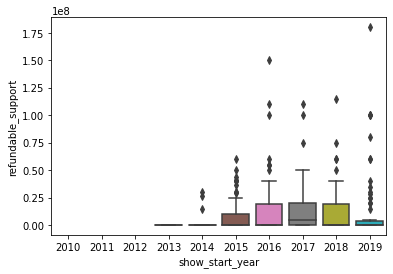

In [86]:
sns.boxplot(x='show_start_year', y='refundable_support', data=data)

<AxesSubplot:xlabel='show_start_year', ylabel='nonrefundable_support'>

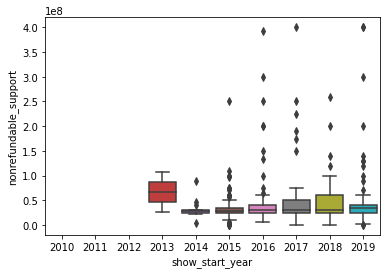

In [87]:
sns.boxplot(x='show_start_year', y='nonrefundable_support', data=data)

<AxesSubplot:xlabel='show_start_year', ylabel='budget'>

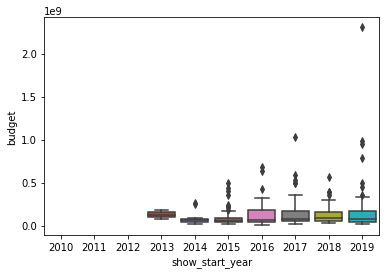

In [88]:
sns.boxplot(x='show_start_year', y='budget', data=data)

<AxesSubplot:xlabel='show_start_year', ylabel='ratings'>

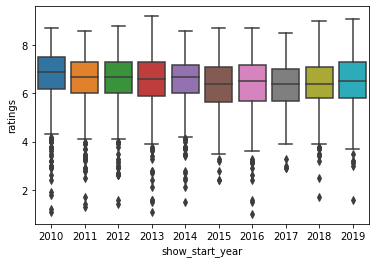

In [89]:
sns.boxplot(x='show_start_year', y='ratings', data=data)

<AxesSubplot:xlabel='show_start_year', ylabel='box_office'>

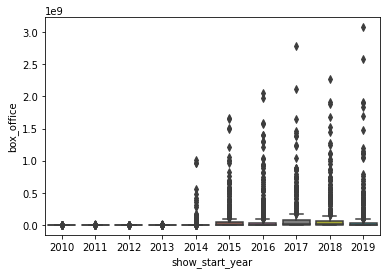

In [90]:
sns.boxplot(x='show_start_year', y='box_office', data=data)

#### Шаг 2.6. Добавим новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [91]:
data['show_start_year'] = data['show_start_date'].dt.year

In [92]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,2016
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0,2013
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN,2016
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN,2014


In [93]:
data['show_start_year'].value_counts()

2010    985
2019    930
2018    891
2016    818
2014    807
2015    705
2013    630
2011    622
2012    593
2017    505
Name: show_start_year, dtype: int64

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [94]:
data['director_first'] = data['director'].str.split(",").str[0]
data['genre_first'] = data['genres'].str.split(",").str[0]
data['director_first'] = data['director_first'].str.strip()
data['genre_first'] = data['genre_first'].str.strip()

In [95]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first,genre_first
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0,2013,В.Меньшов,мелодрама
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро,мюзикл
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN,2016,Эрик Беснард,комедия
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN,2014,В.Титов,мелодрама


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [96]:
data['ratio_help_to_budget'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [97]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,ratio_help_to_budget
count,7.486000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6490.000000,3.158000e+03,7486.000000,332.000000
mean,1.351785e+08,1.186446e+07,4.898099e+07,1.314224e+08,6.479245,7.647870e+07,2014.594176,0.542098
std,3.838218e+07,2.491656e+07,5.998012e+07,1.871482e+08,1.101665,2.403531e+08,3.008452,0.196925
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+06,1.000000,0.000000e+00,2010.000000,0.044043
25%,1.120250e+08,0.000000e+00,2.500000e+07,4.552480e+07,5.900000,8.623900e+04,2012.000000,0.384615
50%,1.210155e+08,0.000000e+00,3.000000e+07,7.119690e+07,6.600000,2.327988e+06,2015.000000,0.614038
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.500000e+08,7.200000,2.397967e+07,2017.000000,0.661412
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09,2019.000000,1.000000


**Вывод**

1) Мы выделили год из даты премьеры и добавили его в новый столбец;

2) Мы выделили первого в списки режиссёра и жанр,а также добавили новые столбцы по ним;

3) Мы посчитали долю гос. поддежки по отношению к бюджету кинокартины.

### Шаг 3. Проведём исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

В `box_office` есть нулевые значения и значения до 100000. Будем проводить анализ как есть

In [98]:
data.groupby('show_start_year')['box_office'].count().sum()

3158

In [99]:
group1 = data.groupby('show_start_year')['box_office'].count().reset_index() #сгруппируем данные по году выхода фильма и сборами в рублях, обнулив при этом индекс

In [100]:
print(group1)

   show_start_year  box_office
0             2010         105
1             2011         109
2             2012         128
3             2013         184
4             2014         279
5             2015         465
6             2016         526
7             2017         357
8             2018         475
9             2019         530


In [101]:
group2 = (data[['show_start_year', 'box_office']].groupby(
    'show_start_year').apply(lambda x : x['box_office'].apply(pd.notna).mean()) * 100).to_frame(
).reset_index()

In [102]:
print(group2)

   show_start_year          0
0             2010  10.659898
1             2011  17.524116
2             2012  21.585160
3             2013  29.206349
4             2014  34.572491
5             2015  65.957447
6             2016  64.303178
7             2017  70.693069
8             2018  53.310887
9             2019  56.989247


In [103]:
grouping = group1.merge(group2, how='left', on='show_start_year')

In [104]:
grouping.rename(columns={'box_office' : 'cinema_count_film', 0 : 'part_of_films'}, inplace=True) #переименовываем столбцы для удобства понимания

In [105]:
print(grouping)

   show_start_year  cinema_count_film  part_of_films
0             2010                105      10.659898
1             2011                109      17.524116
2             2012                128      21.585160
3             2013                184      29.206349
4             2014                279      34.572491
5             2015                465      65.957447
6             2016                526      64.303178
7             2017                357      70.693069
8             2018                475      53.310887
9             2019                530      56.989247


Text(0, 0.5, 'Число фильмов')

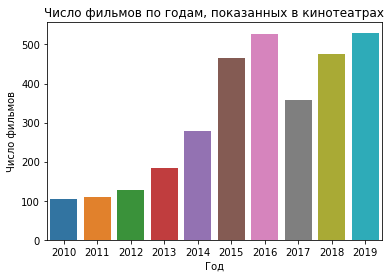

In [106]:
sns.barplot(x='show_start_year', y='cinema_count_film', data=grouping) #строим стобчатую диаграмму
plt.title('Число фильмов по годам, показанных в кинотеатрах') #добавляем легенду всей диаграммы
plt.xlabel('Год') #добавляем легенду по оси абсцисс
plt.ylabel('Число фильмов') #добавляем легенду по оси ординат

Text(0, 0.5, 'Доля фильмов в %')

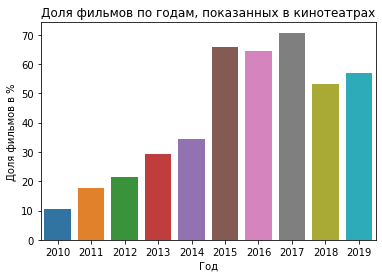

In [107]:
sns.barplot(x='show_start_year', y='part_of_films', data=grouping) #строим слобчатую диаграмму
plt.title('Доля фильмов по годам, показанных в кинотеатрах') #добавляем легенду всей диаграммы
plt.xlabel('Год') #добавляем легенду по оси абсцисс
plt.ylabel('Доля фильмов в %') #добавляем легенду по оси ординат

In [108]:
grouping.corr()

,show_start_year,cinema_count_film,part_of_films
show_start_year,1.000000,0.908732,0.865056
cinema_count_film,0.908732,1.000000,0.902101
part_of_films,0.865056,0.902101,1.000000


**Вывод:**

Из вышеперечисленных данных можно сказать что они неоднородны. До 2015 года было показано довольно мало фильмов, хотя их число росло и доля их разнится от 10 до 30%. Больше всего фильмов было показана в 2019 году, хотя их доля в общем рейтинге кинопоказов находится не на первом месте.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [109]:
grouping = data.groupby('show_start_year')['box_office'].agg('sum')

In [110]:
print(grouping)

show_start_year
2010    2.428654e+06
2011    1.410276e+07
2012    6.955423e+06
2013    2.979971e+07
2014    7.444952e+09
2015    3.949737e+10
2016    4.786630e+10
2017    4.856371e+10
2018    4.966840e+10
2019    4.842571e+10
Name: box_office, dtype: float64


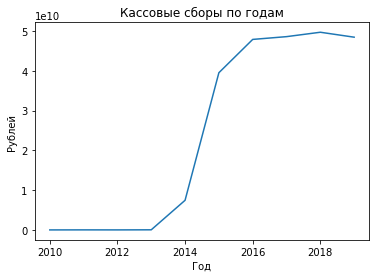

In [111]:
sns.lineplot(data=grouping) #строим кривую
plt.title('Кассовые сборы по годам')
plt.xlabel('Год')
plt.ylabel('Рублей')
plt.show()

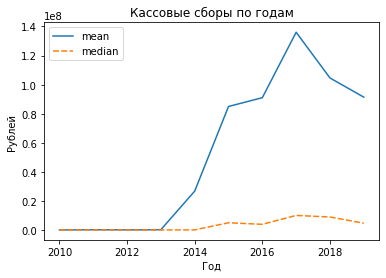

In [112]:
sns.lineplot(data=data.groupby('show_start_year')['box_office'].agg(['mean', 'median']))
plt.title('Кассовые сборы по годам')
plt.xlabel('Год')
plt.ylabel('Рублей')
plt.show()

**Вывод:**

Максимум сборов приходится на 2017 год. Минимальный сбор приходится на 2010-2013 гг. На это указывает как средняя линия, так и медианная линия.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [113]:
grouping=data.groupby('show_start_year')['box_office'].agg(['mean', 'median'])

In [114]:
data. pivot_table(index='show_start_year', values='box_office', aggfunc={'mean', 'median'})

,mean,median
show_start_year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000
2018,1.045651e+08,8891102.210


In [115]:
print(grouping)

                         mean       median
show_start_year                           
2010             2.313004e+04     1700.000
2011             1.293832e+05     3000.000
2012             5.433924e+04     5660.000
2013             1.619549e+05     3522.500
2014             2.668442e+07    18160.000
2015             8.494057e+07  4920933.000
2016             9.100057e+07  3846679.410
2017             1.360328e+08  9968340.000
2018             1.045651e+08  8891102.210
2019             9.136926e+07  4627798.345


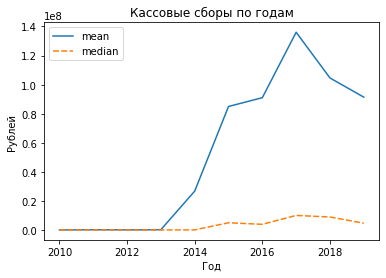

In [116]:
sns.lineplot(data=grouping) #строим кривую
plt.title('Кассовые сборы по годам')
plt.xlabel('Год')
plt.ylabel('Рублей')
plt.show()

**Вывод**

Наблюдается большой разброс в данных, что отражается в разнице значений между сердней и медианой. Мы наболюдаем картину, где имеются совсем мыалые сборы на кино и крайне высокие. Но, повторимся, в целом самым кассовым годом был 2017.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [117]:
data.query('2015 <=show_start_year').groupby('age_restriction')['box_office'].sum().sort_values()

age_restriction
«0+» - для любой зрительской аудитории    8.090774e+08
«18+» - запрещено для детей               4.075962e+10
«6+» - для детей старше 6 лет             5.579861e+10
«12+» - для детей старше 12 лет           6.061945e+10
«16+» - для детей старше 16 лет           7.603473e+10
Name: box_office, dtype: float64

Отметим, что больше всего сборов в категории фильмов для детей старше 16 лет

In [118]:
grouping = data.query('2015 <= show_start_year').groupby(['show_start_year', 'age_restriction'])['box_office'].agg('sum').reset_index()

In [119]:
print(grouping)

    show_start_year                         age_restriction    box_office
0              2015  «0+» - для любой зрительской аудитории  3.790546e+08
1              2015         «12+» - для детей старше 12 лет  1.361608e+10
2              2015         «16+» - для детей старше 16 лет  1.136812e+10
3              2015             «18+» - запрещено для детей  5.432308e+09
4              2015           «6+» - для детей старше 6 лет  8.701799e+09
5              2016  «0+» - для любой зрительской аудитории  1.502288e+08
6              2016         «12+» - для детей старше 12 лет  1.220445e+10
7              2016         «16+» - для детей старше 16 лет  1.666455e+10
8              2016             «18+» - запрещено для детей  6.793930e+09
9              2016           «6+» - для детей старше 6 лет  1.205315e+10
10             2017  «0+» - для любой зрительской аудитории  2.295989e+08
11             2017         «12+» - для детей старше 12 лет  7.851428e+09
12             2017         «16+» - дл

In [120]:
data.pivot_table(
    index='show_start_year',
    columns = 'age_restriction',
    values = 'box_office',
    aggfunc = 'sum')

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2010,1.887611e+06,1.201460e+05,3.665120e+05,5.438500e+04,NaN
2011,1.349987e+07,2.198910e+05,3.815130e+05,1.040000e+03,4.500000e+02
2012,2.266483e+06,1.087340e+05,3.254216e+06,1.825800e+05,1.143410e+06
2013,2.710302e+06,2.091034e+07,6.580696e+05,5.161246e+06,3.597520e+05
2014,3.755623e+08,2.584782e+09,5.442801e+08,2.209713e+09,1.730614e+09
2015,3.790546e+08,1.361608e+10,1.136812e+10,5.432308e+09,8.701799e+09
2016,1.502288e+08,1.220445e+10,1.666455e+10,6.793930e+09,1.205315e+10
2017,2.295989e+08,7.851428e+09,1.874504e+10,9.651496e+09,1.208614e+10
2018,3.244900e+07,1.426729e+10,1.650360e+10,8.760086e+09,1.010497e+10


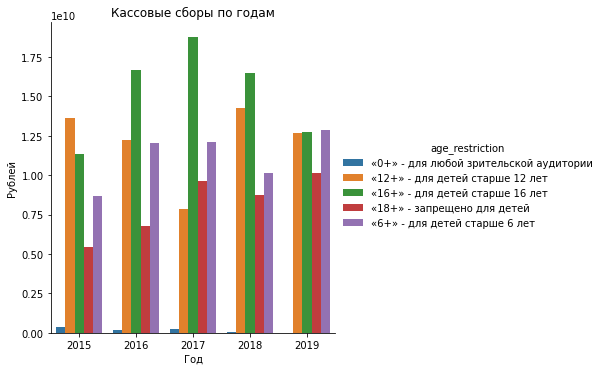

In [121]:
graph = sns.catplot(x='show_start_year', y='box_office', hue='age_restriction', data=grouping, kind='bar')
plt.title('Кассовые сборы по годам')
plt.xlabel('Год')
plt.ylabel('Рублей')
plt.show()

**Вывод:**

На графике видно, что почти во всех годах кроме 2015 лидируют фильмы для детей 16+ лет

In [122]:
grouping.pivot_table(index='show_start_year', values='box_office', aggfunc='median').sort_values(by='box_office')

,box_office
show_start_year,
2015,8.701799e+09
2017,9.651496e+09
2018,1.010497e+10
2016,1.205315e+10
2019,1.268020e+10


### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищем интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [123]:
table = data[data['budget'].isna()==False].copy() #выведим фильмы, где просматривается поддержка средств на кино

In [124]:
display(table)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first,genre_first,ratio_help_to_budget
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04,2014,А.Якимчук,NaN,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,0.510204
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,0.526316
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.529661
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,0.649998


In [125]:
table['total_support'] = table['refundable_support'] + table['nonrefundable_support'] #создадим столбец, где будет отображаться сумма господдержки

In [126]:
table['payback'] = table['box_office'] - table['budget']

In [127]:
table.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,ratio_help_to_budget,total_support,payback
count,3.320000e+02,3.320000e+02,3.320000e+02,3.320000e+02,314.000000,3.180000e+02,332.000000,332.000000,3.320000e+02,3.180000e+02
mean,1.115938e+08,1.186446e+07,4.898099e+07,1.314224e+08,6.000637,1.324324e+08,2016.719880,0.542098,6.084545e+07,4.256980e+05
std,5.703031e+06,2.491656e+07,5.998012e+07,1.871482e+08,1.123948,3.348379e+08,1.640637,0.196925,7.275546e+07,3.159104e+08
min,1.110001e+08,0.000000e+00,0.000000e+00,6.000000e+06,1.000000,1.550000e+03,2013.000000,0.044043,3.000000e+06,-1.971477e+09
25%,1.110049e+08,0.000000e+00,2.500000e+07,4.552480e+07,5.300000,1.236676e+06,2015.000000,0.384615,2.533375e+07,-7.069443e+07
50%,1.110104e+08,0.000000e+00,3.000000e+07,7.119690e+07,6.200000,1.572007e+07,2017.000000,0.614038,3.500000e+07,-4.068082e+07
75%,1.110178e+08,1.500000e+07,4.037500e+07,1.500000e+08,6.700000,1.063730e+08,2018.000000,0.661412,6.000000e+07,-2.362182e+06
max,2.140101e+08,1.800000e+08,4.000000e+08,2.305074e+09,8.500000,3.073569e+09,2019.000000,1.000000,5.000000e+08,2.913569e+09


По вышеизложенным данным видно, что почти половина бюджета - господдержка. Чистую прибыль в среднем фильмы имеют 425 тыс. рублей, однако более 75% фильмов убыточно (3й квантиль)

In [128]:
table.groupby('show_start_year')['total_support'].count()

show_start_year
2013     2
2014    16
2015    86
2016    61
2017    41
2018    56
2019    70
Name: total_support, dtype: int64

Text(0, 0.5, 'Количество фильмов')

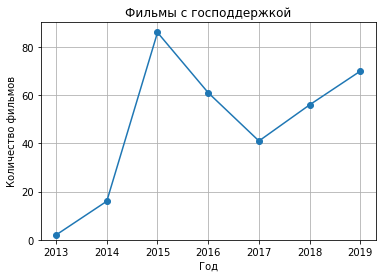

In [129]:
table.groupby('show_start_year')['total_support'].count().plot(ylim=0, grid=True, style='o-')
plt.title('Фильмы с господдержкой')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')

Будем учитывать данные начиная с 2015, поскольку количество фильмов в предыдущих годах мало

In [130]:
table = table[table['show_start_year'] > 2014]

In [131]:
table.groupby('show_start_year')['total_support'].sum() #Посчитаем сколько выделялось денег за каждый год

show_start_year
2015    3.656241e+09
2016    4.303155e+09
2017    3.183972e+09
2018    3.446969e+09
2019    4.904000e+09
Name: total_support, dtype: float64

Text(0, 0.5, 'Количество рублей')

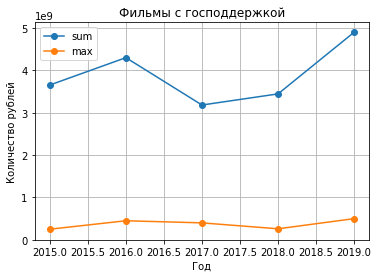

In [132]:
table.groupby('show_start_year')['total_support'].agg(['sum', 'max']).plot(grid=True, ylim=0, style='o-')
plt.title('Фильмы с господдержкой')
plt.xlabel('Год')
plt.ylabel('Количество рублей')

Text(0, 0.5, 'Количество рублей')

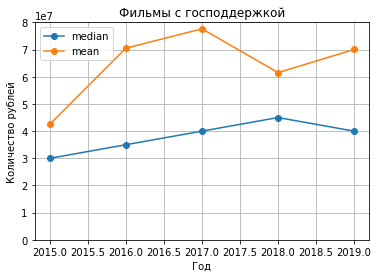

In [133]:
table.groupby('show_start_year')['total_support'].agg(['median', 'mean']).plot(grid=True, ylim=0, style='o-')
plt.title('Фильмы с господдержкой')
plt.xlabel('Год')
plt.ylabel('Количество рублей')

Попробуем совместить предыдущие графики с графиком рейтинга.

Text(0, 0.5, 'Количество рублей')

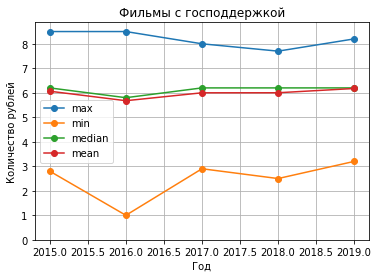

In [134]:
table.groupby('show_start_year')['ratings'].agg(['max','min', 'median', 'mean']).plot(grid=True, ylim=0, style='o-')
plt.title('Фильмы с господдержкой')
plt.xlabel('Год')
plt.ylabel('Количество рублей')

По медиане самый худший год для господдержки был в 2016, как и по средней оценке. В остальных же годах наблюдается незначительное изменениек по сравнению с предыдущими. Больше всего господдержки было в 2019 году, меньше всего в 2016. В 2017 и в 2018 годах по медиане и по средней было больше всего господдержки.

In [135]:
table.corr()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,ratio_help_to_budget,total_support,payback
puNumber,1.000000,0.007472,-0.031469,-0.019093,0.039091,0.044674,-0.027860,0.012705,-0.023382,-0.013241
refundable_support,0.007472,1.000000,0.360857,0.655236,0.012247,0.307982,0.063654,0.009204,0.639584,-0.045878
nonrefundable_support,-0.031469,0.360857,1.000000,0.619170,0.144591,0.457114,0.107270,0.138658,0.947724,0.141289
budget,-0.019093,0.655236,0.619170,1.000000,0.103754,0.372979,0.156376,-0.280956,0.734542,-0.189099
ratings,0.039091,0.012247,0.144591,0.103754,1.000000,0.160857,0.061420,-0.051128,0.123323,0.099822
box_office,0.044674,0.307982,0.457114,0.372979,0.160857,1.000000,0.106103,-0.079808,0.488537,0.840570
show_start_year,-0.027860,0.063654,0.107270,0.156376,0.061420,0.106103,1.000000,-0.106166,0.110197,0.018230
ratio_help_to_budget,0.012705,0.009204,0.138658,-0.280956,-0.051128,-0.079808,-0.106166,1.000000,0.117439,0.089074
total_support,-0.023382,0.639584,0.947724,0.734542,0.123323,0.488537,0.110197,0.117439,1.000000,0.100806
payback,-0.013241,-0.045878,0.141289,-0.189099,0.099822,0.840570,0.018230,0.089074,0.100806,1.000000


<AxesSubplot:>

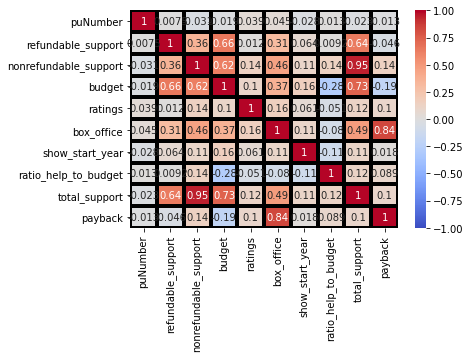

In [136]:
sns.heatmap(
    table.corr(), annot = True, vmin=-1, vmax=1,
    center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black',
) #создадим тепловую карту для более наглядной визуализации

По тепловой карте видно, что с ростом господдержки, растёт и бюджет фильма. рейтинг же на сумму поддержки фильма не влияет

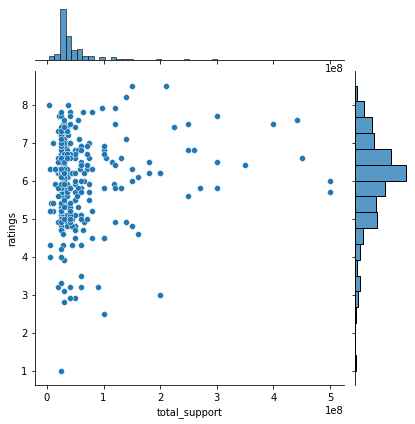

In [137]:
sns.jointplot(data=table, x='total_support', y='ratings', kind='scatter') #Построим также диаграмму рассеяния где будет видна зависимость суммы поддержки фильма от его рейтинга

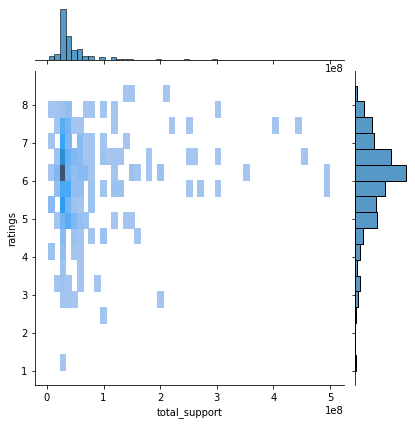

In [138]:
sns.jointplot(data=table, x='total_support', y='ratings', kind='hist') #А также построим гистограмообразную диаграмму

Мы видим, что больше всего картин с поддержкой до 100 миллионов рублей, а также что картины стоимостью более 200 миллионов рублей не опускаются ниже 5 баллов

(-1000000000.0, 1000000000.0)

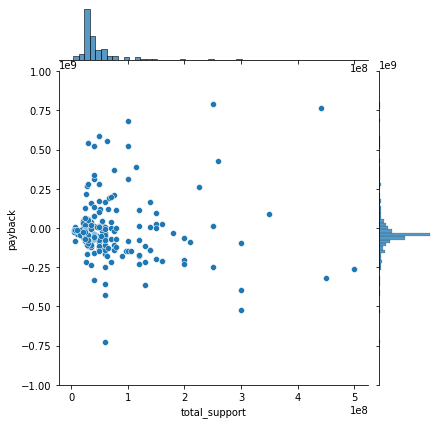

In [139]:
sns.jointplot(data=table, x='total_support', y='payback', kind='scatter');
plt.ylim(-1000000000, 1000000000) #Построим диаграмму рассеивания для визуализации зависимости от суммы поддержки фильма от его окупаемости

(-1000000000.0, 1000000000.0)

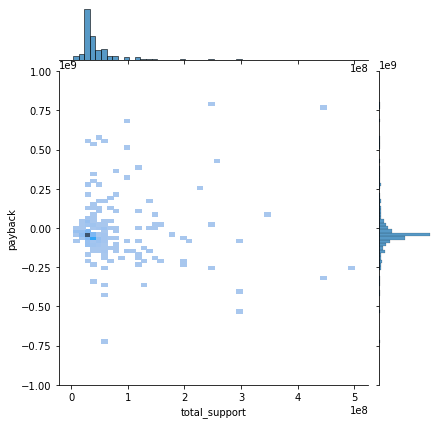

In [140]:
sns.jointplot(data=table, x='total_support', y='payback', kind='hist');
plt.ylim(-1000000000, 1000000000)

По вышеприведённым графикам видно, что большинство фильмов не окупилось.

Попробуем посмотреть популярность жанров и какие были с самой высокой оценкой

In [141]:
table1 = table.groupby('genre_first')[['total_support', 'ratings']].agg(['count', 'sum', 'mean','median'])

In [142]:
table1.columns = ['_'.join(col).strip() for col in table1.columns.values]

In [143]:
table1 = table1.sort_values(by='total_support_count', ascending=False).head(10)

In [144]:
display(table1)

,total_support_count,total_support_sum,total_support_mean,total_support_median,ratings_count,ratings_sum,ratings_mean,ratings_median
genre_first,,,,,,,,
драма,85,5.018904e+09,5.904593e+07,30000000.0,84,536.8,6.390476,6.45
комедия,71,3.052435e+09,4.299204e+07,35000000.0,71,391.1,5.508451,5.80
мультфильм,30,2.391520e+09,7.971733e+07,65000000.0,30,173.3,5.776667,6.15
триллер,15,7.696453e+08,5.130969e+07,40000000.0,15,85.6,5.706667,5.60
мелодрама,13,3.500000e+08,2.692308e+07,28000000.0,13,75.9,5.838462,5.90
фэнтези,11,1.032900e+09,9.390000e+07,34000000.0,11,67.0,6.090909,6.80
ужасы,10,3.550000e+08,3.550000e+07,30000000.0,10,52.0,5.200000,5.10
фантастика,10,1.381000e+09,1.381000e+08,85000000.0,9,51.6,5.733333,5.70
военный,9,4.220009e+08,4.688899e+07,45000000.0,9,58.2,6.466667,6.40


Самыми финансируемыми жанрами оказались драма, комедия, а также мультфильмы.

In [145]:
table2 = table.groupby('genre_first')['total_support'].agg(['count', 'mean', 'median']).reset_index(
).sort_values(by='count', ascending=False).head(10)

In [146]:
table2.sort_values(by='mean', ascending=False)

,genre_first,count,mean,median
18,фантастика,10,1.381000e+08,85000000.0
12,приключения,7,9.942857e+07,40000000.0
19,фэнтези,11,9.390000e+07,34000000.0
10,мультфильм,30,7.971733e+07,65000000.0
5,драма,85,5.904593e+07,30000000.0
16,триллер,15,5.130969e+07,40000000.0
2,военный,9,4.688899e+07,45000000.0
7,комедия,71,4.299204e+07,35000000.0
17,ужасы,10,3.550000e+07,30000000.0
9,мелодрама,13,2.692308e+07,28000000.0


In [147]:
table2.sort_values(by='median', ascending=False)

,genre_first,count,mean,median
18,фантастика,10,1.381000e+08,85000000.0
10,мультфильм,30,7.971733e+07,65000000.0
2,военный,9,4.688899e+07,45000000.0
16,триллер,15,5.130969e+07,40000000.0
12,приключения,7,9.942857e+07,40000000.0
7,комедия,71,4.299204e+07,35000000.0
19,фэнтези,11,9.390000e+07,34000000.0
5,драма,85,5.904593e+07,30000000.0
17,ужасы,10,3.550000e+07,30000000.0
9,мелодрама,13,2.692308e+07,28000000.0


In [148]:
table1 = table.groupby('director_first')['total_support', 'payback', 'ratings'].agg(['count', 'sum', 'mean','median'])

In [149]:
table1.columns = ['_'.join(col).strip() for col in table1.columns.values]

In [150]:
table1.sort_values(by='total_support_sum', ascending=False).head(10)

,total_support_count,total_support_sum,total_support_mean,total_support_median,payback_count,payback_sum,payback_mean,payback_median,ratings_count,ratings_sum,ratings_mean,ratings_median
director_first,,,,,,,,,,,,
Ф.Бондарчук,2,750000000.0,375000000.0,375000000.0,1,7.883215e+08,7.883215e+08,7.883215e+08,2,11.3,5.650000,5.65
Н.Хомерики,3,660000000.0,220000000.0,300000000.0,3,-3.255617e+08,-1.085206e+08,-9.293034e+07,3,18.1,6.033333,5.80
А.Кравчук,1,500000000.0,500000000.0,500000000.0,1,-2.622968e+08,-2.622968e+08,-2.622968e+08,1,6.0,6.000000,6.00
А.Мизгирев,1,450000000.0,450000000.0,450000000.0,1,-3.199154e+08,-3.199154e+08,-3.199154e+08,1,6.6,6.600000,6.60
Н.Лебедев,1,442104482.0,442104482.0,442104482.0,1,7.669715e+08,7.669715e+08,7.669715e+08,1,7.6,7.600000,7.60
А.Мегердичев,1,400000000.0,400000000.0,400000000.0,1,2.189494e+09,2.189494e+09,2.189494e+09,1,7.5,7.500000,7.50
Р.Давлетьяров,4,352000000.0,88000000.0,86000000.0,4,-3.151008e+08,-7.877521e+07,-1.000335e+08,4,28.6,7.150000,7.10
Д.Дьяченко,4,351000000.0,87750000.0,83000000.0,4,1.624203e+09,4.060508e+08,1.548375e+08,4,22.6,5.650000,5.45
И.Шурховецкий,1,350000000.0,350000000.0,350000000.0,1,9.039234e+07,9.039234e+07,9.039234e+07,1,6.4,6.400000,6.40


Больше всего заработал Фёдор Бондарчук, сняв при этов всего два фильма при этом имея средние рейтинги. На втором месте стоит Н. Хомерики, однако он имеет более убыточны фильмы и более высокие рейтинги. На третьем же месте по выручке стоит А. Кравчук.

In [151]:
table1.sort_values(by='payback_sum', ascending=False).head(10) #Отсортируем фильмы по их выручке

,total_support_count,total_support_sum,total_support_mean,total_support_median,payback_count,payback_sum,payback_mean,payback_median,ratings_count,ratings_sum,ratings_mean,ratings_median
director_first,,,,,,,,,,,,
К.Шипенко,2,285000000.0,1.425000e+08,142500000.0,2,3.172515e+09,1.586257e+09,1.586257e+09,2,14.2,7.10,7.10
А.Мегердичев,1,400000000.0,4.000000e+08,400000000.0,1,2.189494e+09,2.189494e+09,2.189494e+09,1,7.5,7.50,7.50
А.Сидоров,1,180000000.0,1.800000e+08,180000000.0,1,1.707969e+09,1.707969e+09,1.707969e+09,1,6.5,6.50,6.50
Д.Дьяченко,4,351000000.0,8.775000e+07,83000000.0,4,1.624203e+09,4.060508e+08,1.548375e+08,4,22.6,5.65,5.45
О.Трофим,1,85000000.0,8.500000e+07,85000000.0,1,1.297147e+09,1.297147e+09,1.297147e+09,0,0.0,NaN,NaN
Ф.Бондарчук,2,750000000.0,3.750000e+08,375000000.0,1,7.883215e+08,7.883215e+08,7.883215e+08,2,11.3,5.65,5.65
Н.Лебедев,1,442104482.0,4.421045e+08,442104482.0,1,7.669715e+08,7.669715e+08,7.669715e+08,1,7.6,7.60,7.60
Д.Шмидт,3,215000000.0,7.166667e+07,75000000.0,3,6.983123e+08,2.327708e+08,3.110692e+08,3,18.6,6.20,6.20
Д.Киселев,2,350000000.0,1.750000e+08,175000000.0,2,6.969594e+08,3.484797e+08,3.484797e+08,2,13.3,6.65,6.65


По таблице видно, что более прибыльными фильмами оказались у К. Шипенко, а также фильмы А. Мегердичева и А. Сидорова.

**Вывод**

В целом, можно сказать, что большинство фильмов не окупается, однако фильмы со средними оценками могут приносить большую прибыль. Самыми финансируемыми жанрами оказались драма, комедия, а также мультфильмы. Больше всего заработал Фёдор Бондарчук, сняв при этов всего два фильма при этом имея средние рейтинги. Самым кассовым режиссёром окался К. Шипенко.

### Шаг 5. Напишем общий вывод

В ходе написания сборного проекта-1 были выполнены следующие работы:

Шаг 1. В ходе изучения данных были объединены две таблицы по столбцу `puNumber`.

Шаг. 2 В ходе предоработки данных мы заменили тип в столбце show_start_date на datetime и заменили на NaN процентные значения в столбце ratings. Убрали процентные значения в столбце `ratings`, заменив их нулями. Заполнили пропуски в столбцах `film_studio`, `production_country`. Проверили данные на дубликаты и выяснили, что дублирование фильмов связано с тем, что им выдавалось неоднократно прокатное удостоверение. Возможно, данные фильмы были показаны несколько раз подряд. Исправим проблемные значения в столбце `type`. Также мы заменили нулевыми значениями бюджет, где сумма превышала значение бюджета. Также мы:

1) Выделили год из даты премьеры и добавили его в новый столбец;

2) Выделили первого в списки режиссёра и жанр,а также добавили новые столбцы по ним;

3) Посчитали долю гос. поддежки по отношению к бюджету кинокартины.

Шаг. 3 В ходе проведения исследовательского анализа данных, мы ввяснили, что до 2015 года было показано довольно мало фильмов, хотя их число росло и доля их разнится от 10 до 30%. Больше всего фильмов было показана в 2019 году, хотя их доля в общем рейтинге кинопоказов находится не на первом месте. Максимум сборов приходится на 2017 год. Минимальный сбор приходится на 2010-2013 гг. На это указывает как средняя линия, так и медианная линия. 

Выяснили, что наблюдается большой разброс в данных, что отражается в разнице значений между сердней и медианой. Мы наболюдаем картину, где имеются совсем мыалые сборы на кино и крайне высокие. Выявили также, что почти во всех годах кроме 2015 лидируют фильмы для детей 16+ лет.

Шаг. 4 В ходе исследования фильмов, которые получыили господдержку было отмечено, что большинство фильмов не окупается, однако фильмы со средними оценками могут приносить большую прибыль. Самыми финансируемыми жанрами оказались драма, комедия, а также мультфильмы. Больше всего заработал Фёдор Бондарчук, сняв при этов всего два фильма при этом имея средние рейтинги. Самым кассовым режиссёром окался К. Шипенко.

Шаг. 5 Был написан общий вывод.